# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain
import numpy as np

excel_path = "data/export.xlsx"
parquet_path = "data/export.parquet"

In [2]:
# Load the data from the first sheet
data = pd.read_excel(excel_path, sheet_name='Sheet1')

### Data types

In [3]:

# Display basic information and the first few rows of the dataset
data_info = data.info()

print(data_info)
data.sample(5).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9975 entries, 0 to 9974
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              9975 non-null   int64  
 1   airlines                9975 non-null   object 
 2   booking_window_group    9975 non-null   object 
 3   children                9975 non-null   int64  
 4   distance                9906 non-null   float64
 5   est_dst_temperature     9933 non-null   float64
 6   src_dst_gdp             9365 non-null   float64
 7   bag_total_price         9975 non-null   float64
 8   bag_volume              9975 non-null   int64  
 9   bag_weight              9975 non-null   int64  
 10  is_intercontinental     9975 non-null   int64  
 11  nr_of_stopovers         9975 non-null   int64  
 12  travel_time             9975 non-null   float64
 13  within_country          9975 non-null   int64  
 14  price                   9824 non-null   

,4975,7622,9177,2980,2588
Unnamed: 0,4975,7622,9177,2980,2588
airlines,airline1,airline13,airline5,airline3,airline7
booking_window_group,7 - 13 days,21 - 60 days,4 - 6 days,21 - 60 days,61 - 121 days
children,0,0,0,0,0
distance,697.986974,1898.909125,517.816122,1994.593156,3480.925881
est_dst_temperature,-4.882687,10.251569,0.385418,27.418227,17.492971
src_dst_gdp,1.0,1.169278,0.716219,1.0,0.706728
bag_total_price,18.632,49.300003,22.644001,92.480003,55.233006
bag_volume,750000,113568,750000,109512,113568
bag_weight,23,23,23,18,23


Data seems to be well formatted and of the expected types:
- Categorical data: `airlines`, `booking_window_group`, `partner`, `market_group`
- Floats: `distance`, `est_dst_temperature`, `src_dst_gdp`, `bag_total_price`, `travel_time`, `price`, `bag_base_price`
- Integers: `children`, `bag_weight`, `nr_of_stopovers`, `passengers`
- Boolean: `is_intercontinental`, `within_country`, `us_movement_outside_us`, `Bag_Purchased`
- Constant: `markup`

In [4]:
categorical = ['airlines', 'booking_window_group', 'partner', 'market_group']
floats = ['distance', 'est_dst_temperature', 'src_dst_gdp', 'bag_total_price', 'travel_time', 'price', 'bag_base_price']
ints = ['children', 'bag_weight', 'nr_of_stopovers', 'passengers']
bools = ['is_intercontinental', 'within_country', 'us_movement_outside_us', 'Bag_Purchased']
const = ['markup']

In [5]:
data[bools] = data[bools].astype('category')

Missing values mostly on 
- 'src_dst_gdp' (6%): Probably due to data unavailability of third world countries
- 'price' (1%): Second most frequent miss, no obvious reason
- 'est_dst_temperature' (0.4%) of missing entries, probably due to unavailable data
- 'distance' (0.6%)

### Summary Statistics

In [6]:
# Numerical columns
data[ints + floats].describe()

,children,bag_weight,nr_of_stopovers,passengers,distance,est_dst_temperature,src_dst_gdp,bag_total_price,travel_time,price,bag_base_price
count,9975.000000,9975.000000,9975.000000,9975.00000,9906.000000,9933.000000,9365.000000,9975.000000,9975.000000,9824.000000,9975.000000
mean,0.057043,20.116792,0.000401,1.54005,1536.352650,14.083276,1.138487,64.616167,2.604242,106.072021,38.009509
std,0.312904,3.583054,0.020022,1.01046,1042.876364,9.063411,1.771107,29.105234,1.301669,68.292405,17.120725
min,0.000000,15.000000,0.000000,1.00000,102.131987,-16.818072,0.014361,12.223001,0.583333,6.660000,7.190000
25%,0.000000,18.000000,0.000000,1.00000,726.907555,7.609947,1.000000,34.714001,1.583333,58.370000,20.420000
50%,0.000000,23.000000,0.000000,1.00000,1320.216732,16.005512,1.000000,78.047005,2.333333,87.960000,45.910000
75%,0.000000,23.000000,0.000000,2.00000,2024.621049,20.732469,1.000000,86.921005,3.250000,135.335000,51.130001
max,5.000000,25.000000,1.000000,9.00000,8887.103223,33.225635,69.635286,169.575012,11.083333,810.280000,99.750000


Actually, there are no flights with more than 1 stopover, however, it's worth keeping as an int because there could be more.

In [7]:
# Categrorical columns
data[categorical + bools].describe()

,airlines,booking_window_group,partner,market_group,is_intercontinental,within_country,us_movement_outside_us,Bag_Purchased
count,9975,9975,9975,9975,9975,9975,9975,9975
unique,13,8,2,18,2,2,2,2
top,airline10,0 - 3 days,partner1,market1,0,1,1,0
freq,2100,2670,5571,3693,9615,6564,7123,7591


* `airline10` is significantly over-represented.
* Most flights booked in the `0 - 3 days` window.
* `market1` is hugely overrepresented
* The great majority of flights are **not intercontinental**.

In [8]:
# Categorical columns
data[categorical].describe(include=['O'])

,airlines,booking_window_group,partner,market_group
count,9975,9975,9975,9975
unique,13,8,2,18
top,airline10,0 - 3 days,partner1,market1
freq,2100,2670,5571,3693


In [9]:
# Boolean columns
data[bools].mean()

TypeError: 'Categorical' with dtype category does not support reduction 'mean'

**There is a 23% of positives in the data set. This is a mild class imbalance and needs to be accounted for**

## Visualize statistics

#### Numerical variables

In [10]:
ints + floats

['children',
 'bag_weight',
 'nr_of_stopovers',
 'passengers',
 'distance',
 'est_dst_temperature',
 'src_dst_gdp',
 'bag_total_price',
 'travel_time',
 'price',
 'bag_base_price']

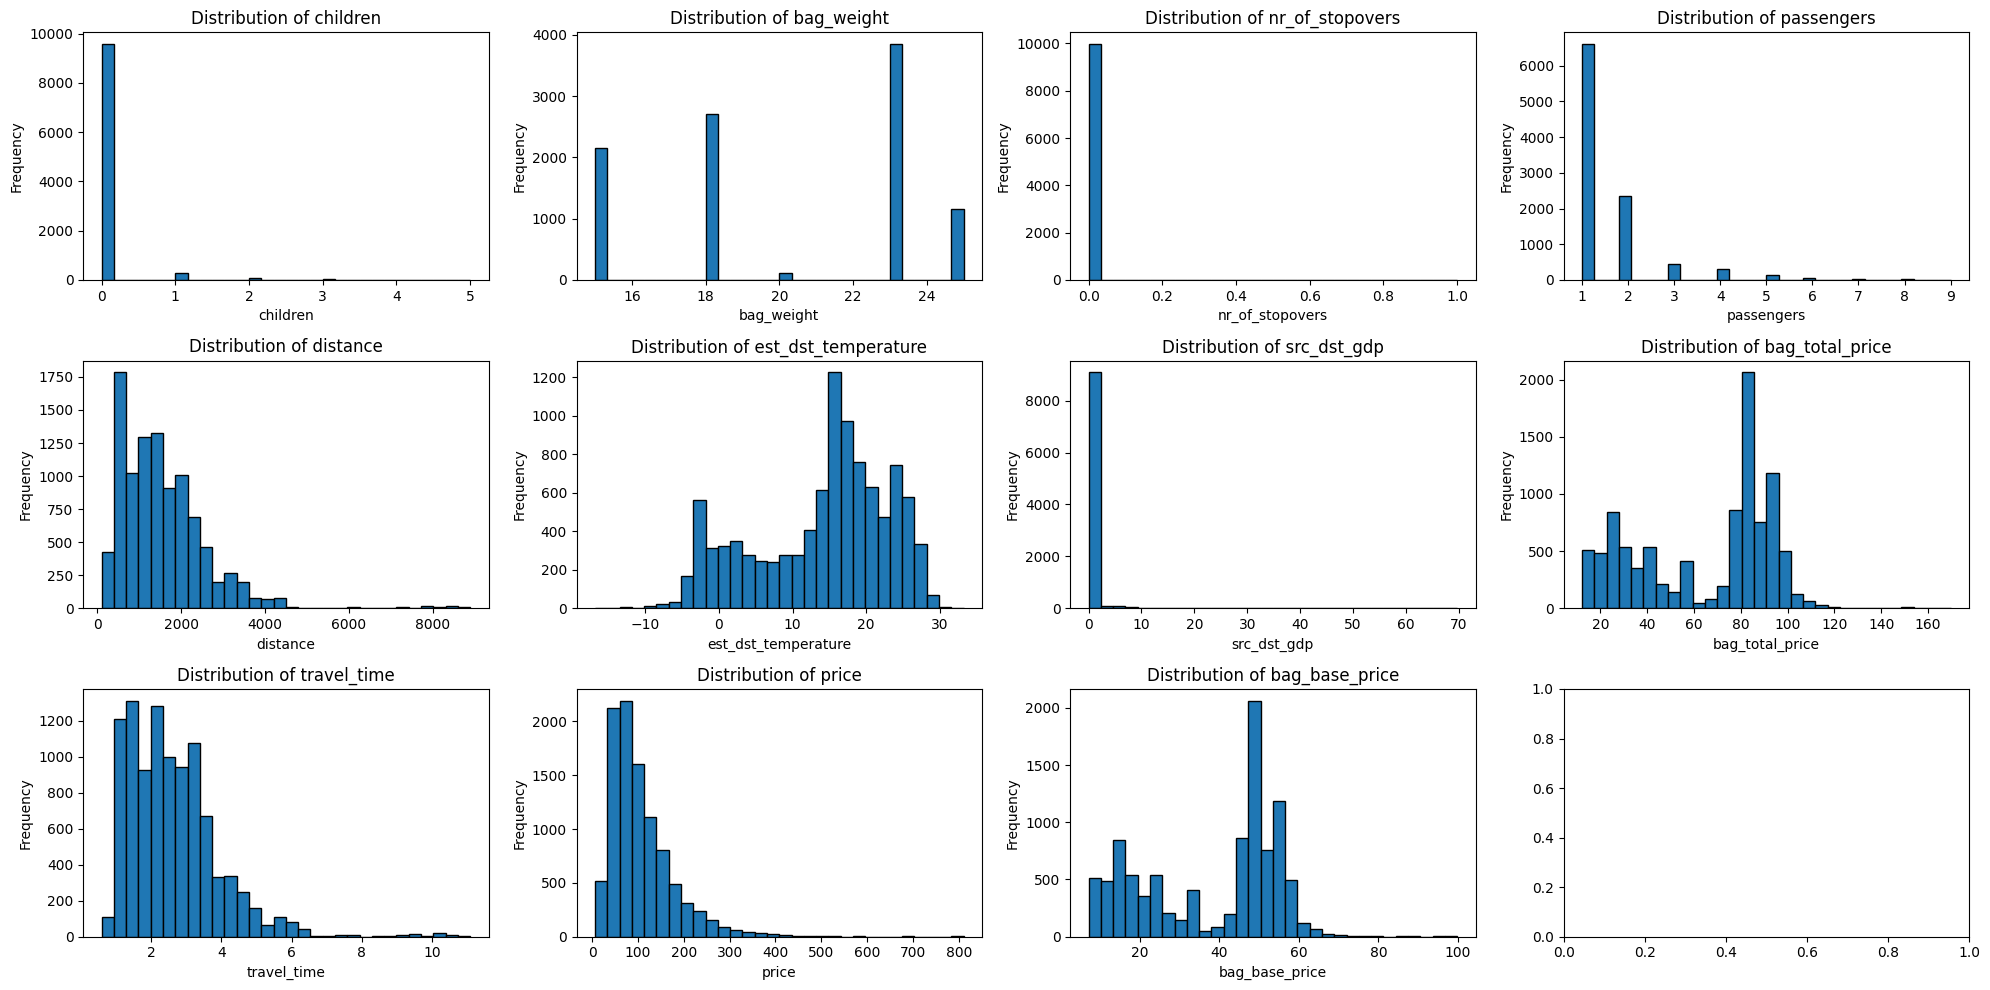

In [11]:
# List of numerical columns to plot
numerical_columns = ints + floats

# Plotting the distribution of each numerical column
fig, axes = plt.subplots(3, 4, figsize=(20, 10))

for column, ax in zip(numerical_columns, chain(*axes)):
    ax.hist(data[column].dropna(), bins=30, edgecolor='k')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

`src_dst_gdp` is highly concentrated around 1. Let's blow it up to see if there is structure

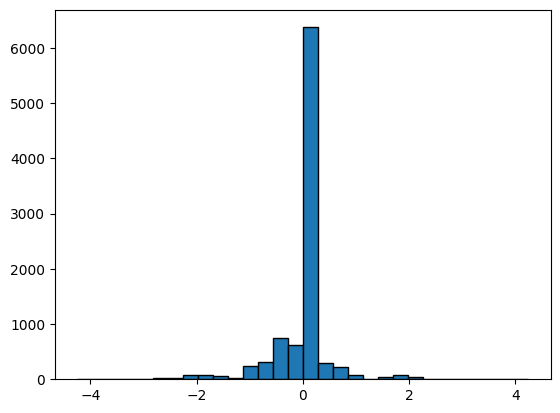

In [12]:
fig = plt.hist(np.log(data['src_dst_gdp'].dropna()), bins=30, edgecolor='k')

#### Boolean variables

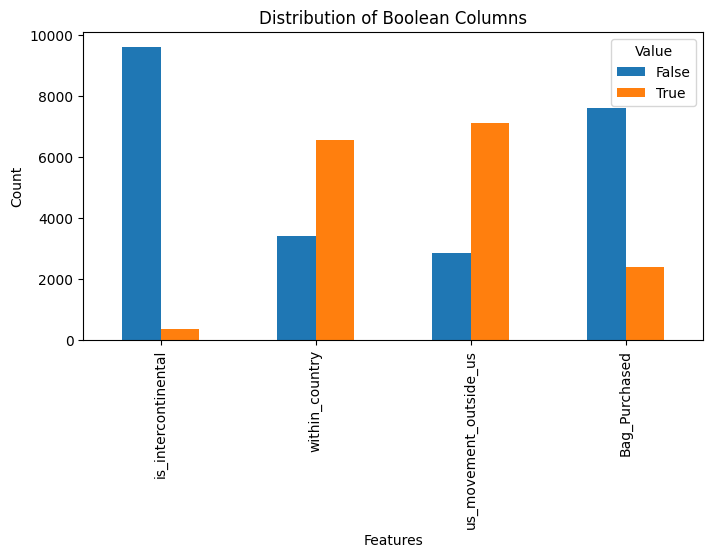

In [13]:
# Count True and False values for each column
counts = data[bools].astype(bool).apply(lambda x: x.value_counts()).T
counts = counts.fillna(0)  # Fill NaN with 0

# Plotting
fig, ax = plt.subplots(figsize=(8, 4))

# Create a bar chart
counts.plot(kind='bar', ax=ax)

# Customize the plot
ax.set_xlabel('Features')
ax.set_ylabel('Count')
ax.set_title('Distribution of Boolean Columns')
ax.legend(title='Value')

plt.show()

#### Categorical Variables

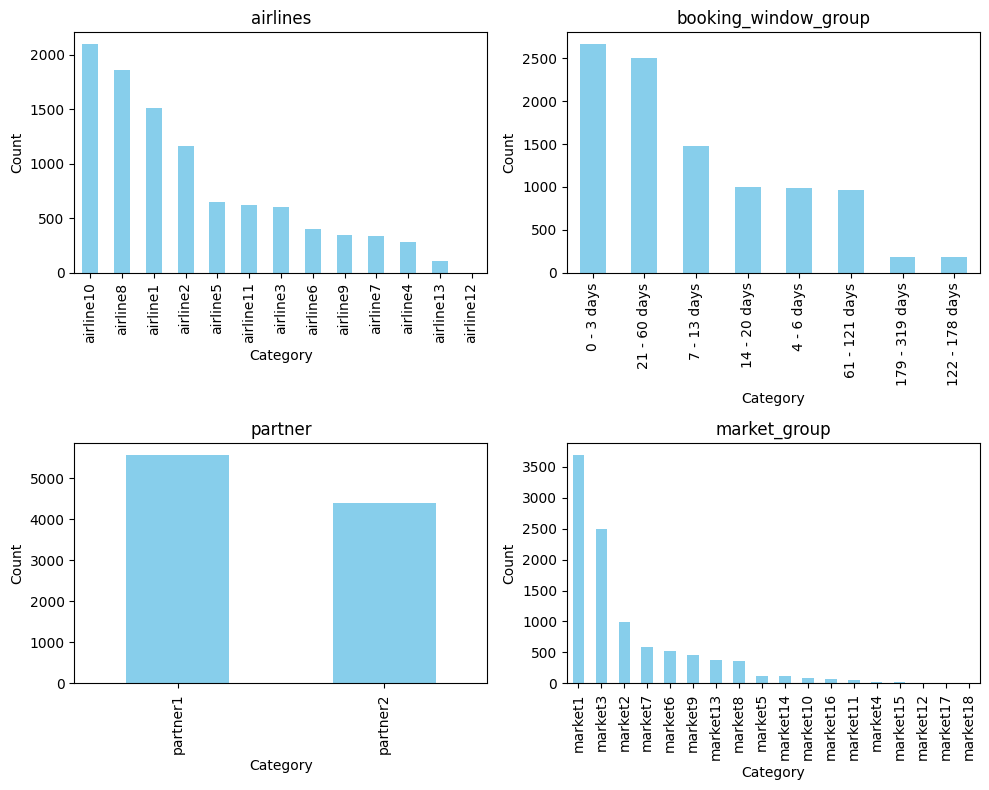

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create a bar chart for each categorical column
for col, ax in zip(categorical, chain(*axes)):
    data[col].value_counts().plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(col)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

## Missing values

In [15]:
data.isna().mean()

Unnamed: 0                0.000000
airlines                  0.000000
booking_window_group      0.000000
children                  0.000000
distance                  0.006917
est_dst_temperature       0.004211
src_dst_gdp               0.061153
bag_total_price           0.000000
bag_volume                0.000000
bag_weight                0.000000
is_intercontinental       0.000000
nr_of_stopovers           0.000000
travel_time               0.000000
within_country            0.000000
price                     0.015138
partner                   0.000000
passengers                0.000000
us_movement_outside_us    0.000000
market_group              0.000000
markup                    0.000000
bag_base_price            0.000000
Bag_Purchased             0.000000
dtype: float64

#### `price` missing entries

In [16]:
data[data['price'].isna()][categorical+bools].describe()

,airlines,booking_window_group,partner,market_group,is_intercontinental,within_country,us_movement_outside_us,Bag_Purchased
count,151,151,151,151,151,151,151,151
unique,12,8,2,13,2,2,2,2
top,airline8,21 - 60 days,partner1,market1,0,1,1,0
freq,37,45,76,57,144,102,104,111


In [17]:
data[data['price'].isna()][numerical_columns].describe()

,children,bag_weight,nr_of_stopovers,passengers,distance,est_dst_temperature,src_dst_gdp,bag_total_price,travel_time,price,bag_base_price
count,151.000000,151.000000,151.0,151.000000,150.000000,148.000000,140.000000,151.000000,151.000000,0.0,151.000000
mean,0.092715,19.496689,0.0,1.814570,1551.384395,13.210625,1.351769,67.103055,2.672075,NaN,39.472384
std,0.389033,3.581199,0.0,1.157031,948.176726,9.031066,2.268839,27.775696,1.226065,NaN,16.338645
min,0.000000,15.000000,0.0,1.000000,318.214769,-7.382005,0.108724,12.325001,1.000000,NaN,7.250000
25%,0.000000,15.000000,0.0,1.000000,816.015598,7.075624,1.000000,39.202002,1.666667,NaN,23.060000
50%,0.000000,18.000000,0.0,1.000000,1529.106647,15.299916,1.000000,80.766998,2.750000,NaN,47.509998
75%,0.000000,23.000000,0.0,2.000000,2063.776539,19.504059,1.000000,89.573002,3.250000,NaN,52.689999
max,2.000000,25.000000,0.0,6.000000,7738.541775,28.154031,18.521766,108.120003,9.750000,NaN,63.599998


## Correlation analysis

### Correlation amongst numerical variables

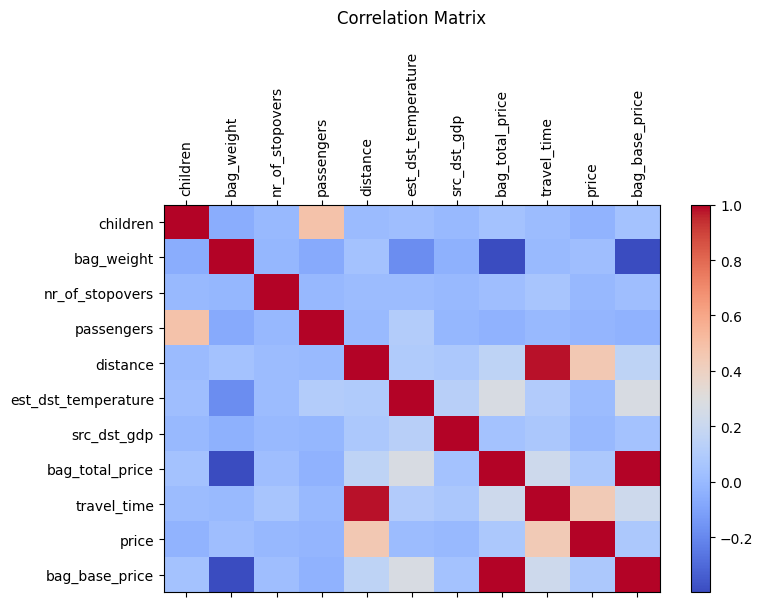

In [18]:
# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(8, 5))
plt.matshow(correlation_matrix, fignum=1, cmap='coolwarm', aspect='auto')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.title('Correlation Matrix', pad=20)
plt.show()

#### Largest to smallest correlations

In [19]:
# Sort pairs in terms of their degree of correlation
sorted_correlations = correlation_matrix.where(
    # Since the corr. matrix is symmetric, use a triangular mask to avoid duplication
    ~np.triu(np.ones(correlation_matrix.shape)).astype(bool)
).stack().dropna().sort_values()

In [20]:
# Largest correlation

sorted_correlations.tail(10)

bag_base_price   distance               0.154657
travel_time      bag_total_price        0.219677
bag_base_price   travel_time            0.219677
bag_total_price  est_dst_temperature    0.268451
bag_base_price   est_dst_temperature    0.268451
price            travel_time            0.440927
                 distance               0.450951
passengers       children               0.482539
travel_time      distance               0.980361
bag_base_price   bag_total_price        1.000000
dtype: float64

In [21]:
# Largest negative correlation

sorted_correlations.head(10)

bag_total_price      bag_weight   -0.398824
bag_base_price       bag_weight   -0.398824
est_dst_temperature  bag_weight   -0.182007
passengers           bag_weight   -0.068017
bag_weight           children     -0.057900
src_dst_gdp          bag_weight   -0.040089
bag_total_price      passengers   -0.035985
bag_base_price       passengers   -0.035985
price                children     -0.031026
                     passengers   -0.018743
dtype: float64

### Correlation amongst categorical variables

In [22]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

categorical_columns = categorical + bools

cat_bool_data = pd.DataFrame()

# Convert categorical variables to numerical codes
for col in categorical_columns:
    cat_bool_data[col] = data[col].astype('category').cat.codes

In [23]:
mi_df = pd.DataFrame(
    {
        col: mutual_info_classif(cat_bool_data, cat_bool_data[col]) for col in cat_bool_data.columns
    },
    index=cat_bool_data.columns, columns=cat_bool_data.columns
)

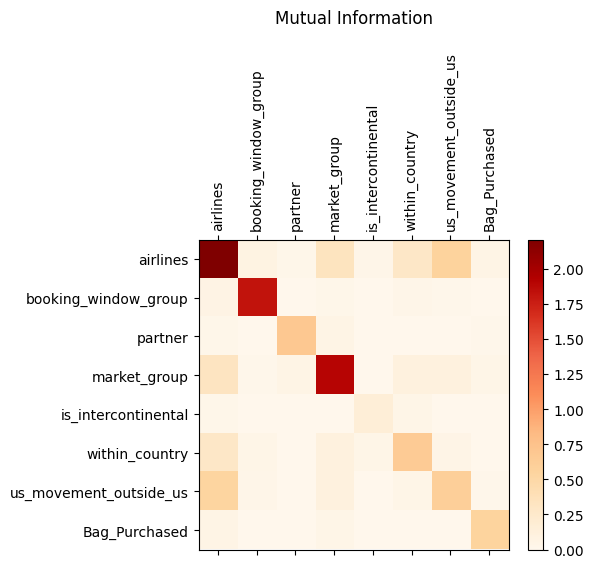

In [24]:
plt.figure(figsize=(5, 4))
plt.matshow(mi_df, fignum=1, cmap='OrRd', aspect='auto')
plt.xticks(range(len(mi_df.columns)), mi_df.columns, rotation=90)
plt.yticks(range(len(mi_df.columns)), mi_df.columns)
plt.colorbar()
plt.title('Mutual Information', pad=20)
plt.show()

In [25]:
# Pairs of variables with largest mutual info

mi_df.where(
    # Since the corr. matrix is symmetric, use a triangular mask to avoid duplication
    ~np.triu(np.ones(mi_df.shape)).astype(bool)
).stack().dropna().sort_values().tail(10)

within_country          is_intercontinental    0.042142
us_movement_outside_us  within_country         0.042816
market_group            partner                0.054270
Bag_Purchased           airlines               0.057424
booking_window_group    airlines               0.068239
us_movement_outside_us  market_group           0.109933
within_country          market_group           0.111754
                        airlines               0.280932
market_group            airlines               0.324311
us_movement_outside_us  airlines               0.538561
dtype: float64

`airlines` is the variable most correlated with others: `us_movement_outside_us`, `market_group`, `within_county`

### Correlation between numerical and categorical data

In [26]:
from scipy.stats import f_oneway

# Dictionary to hold ANOVA results
anova_results = {}

# Perform ANOVA for each categorical variable against each numerical variable
for cat_col in categorical_columns:
    anova_results[cat_col] = {}
    for num_col in numerical_columns:
        # Group numerical data by each level of the categorical variable
        groups = [data[num_col][data[cat_col] == level].dropna() for level in data[cat_col].unique()]
        f_stat, p_value = f_oneway(*groups)
        anova_results[cat_col][num_col] = (f_stat, p_value)


# Create a DataFrame for the results
anova_df = pd.DataFrame(anova_results).T
anova_df.index.name = 'categorical'
anova_df.columns.name = 'numerical'

anova_fstat = anova_df.map(lambda x: x[0])
anova_pval = anova_df.map(lambda x: x[1])

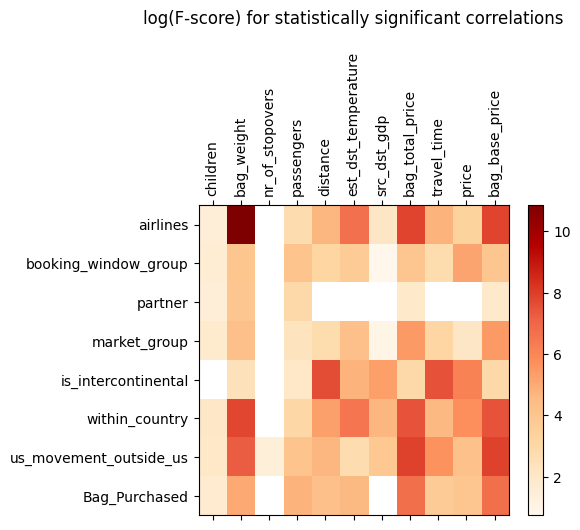

In [27]:
# Where do we find statistically significant correlations?

fstat = np.log(anova_fstat.where(anova_pval.lt(0.05)))

plt.figure(figsize=(5, 4))
plt.matshow(fstat, fignum=1, cmap='OrRd', aspect='auto')
plt.xticks(range(len(fstat.columns)), fstat.columns, rotation=90)
plt.yticks(range(len(fstat.index)), fstat.index)
plt.colorbar()
plt.title('log(F-score) for statistically significant correlations', pad=20)
plt.show()

Big correlation between `bag_weight` and `airline` as each airline probably has their own policy. Significant correlation between `airline` and `bag_bag_price`, `bag_total_price` (as we're working with a constant markup), and `est_dst_temperature` as different airlines travel to different destinations.

## Look for interactions

### Among numerical vars vs target variable

In [28]:
from sklearn.preprocessing import PolynomialFeatures

df = pd.DataFrame(data[numerical_columns].dropna().drop(columns=['bag_base_price']))

# Initialize the PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Fit and transform the data
transformed_data = poly.fit_transform(df)

# Create a new dataframe with the generated features
feature_names = poly.get_feature_names_out(df.columns)
interaction_numerical = pd.DataFrame(transformed_data, columns=feature_names)


In [29]:
# Dictionary to hold ANOVA results
anova_results = {}

# Perform ANOVA for each categorical variable against each numerical variable
for cat_col in interaction_numerical.columns:
    anova_results[cat_col] = {}
    for num_col in interaction_numerical.columns:
        # Group numerical data by each level of the categorical variable
        groups = [interaction_numerical[num_col][interaction_numerical[cat_col] == level].dropna() for level in interaction_numerical[cat_col].unique()]
        f_stat, p_value = f_oneway(*groups)
        anova_results[cat_col][num_col] = (f_stat, p_value)


# Create a DataFrame for the results
anova_df = pd.DataFrame(anova_results).T
anova_df.index.name = 'categorical'
anova_df.columns.name = 'numerical'

anova_fstat = anova_df.map(lambda x: x[0])
anova_pval = anova_df.map(lambda x: x[1])

/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/Users/amonras/.pyenv/versions/3.12.2/envs/kiwi/lib/python3.12/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if _f_oneway_is_too_small(samples):


TypeError: at least two inputs are required; got 1.

## Missing data imputation

In [ ]:
# What are the most correlated variables with `price`?

fstat['price']

Let's take `booking_window_group` and `is_continental` to fill the missing prices. These are intuitively good predictors, mostly uncorrelated and they have no missing entries.

In [ ]:
data.groupby(['booking_window_group', 'is_intercontinental'])['price'].apply('median').unstack()